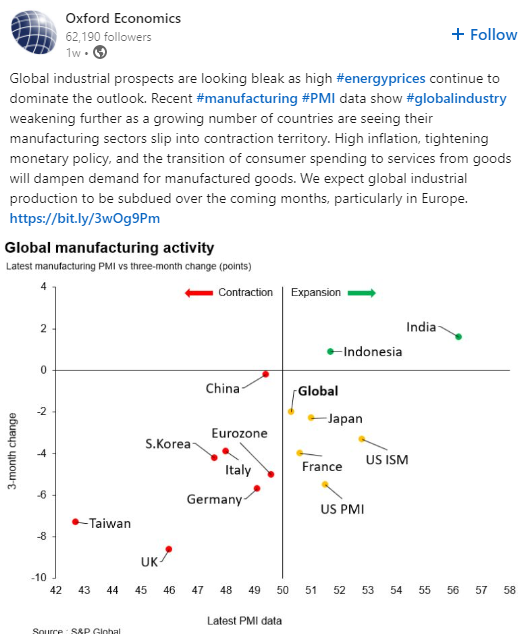

In [ ]:
# Carregando as bibliotecas

import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas_datareader as dr


get_ipython().run_line_magic("matplotlib", "inline")
import warnings
warnings.filterwarnings("ignore")

In [ ]:
meu_html = pd.read_html("https://www.theglobaleconomy.com/rankings/pmi_manufacturing/")

In [ ]:
import requests

url = "https://www.theglobaleconomy.com/rankings/pmi_manufacturing/"

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

meu_html = requests.get(url, headers = header)

In [ ]:
tabelas = pd.read_html(meu_html.text)
pmi = tabelas[0] 
pmi.head()

In [ ]:
# Se o site precisar de autenticação:

#import requests

#requisicao = requests.get("Insira a url aqui"
#                          , auth=("username", "password")
#                           , headers = header)
#tabelas = pd.read_html(requisicao.text)

In [ ]:
paises = ["India", "Indonesia", "China", "South Korea", "Italy", "Germany", "Taiwan", "United Kingdom", "USA"
, "Brazil", "France", "Japan"]

pmi_filtrado = pmi[pmi["Countries"].isin(paises)]
pmi_filtrado = pmi_filtrado.replace(["South Korea", "United Kingdom"], ["S. Korea", "U.K."])
pmi_filtrado["3 months change"] = pmi_filtrado["Latest available value"] - pmi_filtrado["Value 3 months ago"]

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = pmi_filtrado["Latest available value"], y = pmi_filtrado["3 months change"]
                         , mode = "markers"
                         , marker_color = pmi_filtrado["Latest available value"]
                         , text = pmi_filtrado["Countries"] # hover text goes here
                         , name = "PMI"))

fig.update_layout(height = 500, width = 800 # tamanho em pixels
                  , title_text = "Atividade Manufatureira Global"
                  , title_font_color = "black"
                  , xaxis_title = "Última Medição"
                  , yaxis_title = "Diferença dos últimos 3 meses"
                  , legend_title = "Ativos"
                  , font = dict(size = 15, color = "black")
                 )

fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = pmi_filtrado["Latest available value"], y = pmi_filtrado["3 months change"]
                         , marker_color = "blue" #pmi_filtrado["Latest available value"]
                         , text = pmi_filtrado["Countries"]
                         , textposition = "middle left"
                         , textfont = dict(color = "black", size = 12)
                         , mode = "markers+text"
                         , name = "pmi_filtrado"))

# Adiciono a linha vertical
fig.add_vline(x = 50, line_width = 1, line_dash = "dash", line_color = "black")

# Adiciono a linha horizontal
fig.add_hline(y = 0, line_width = 1, line_dash = "dash", line_color = "black")


# Adiciono o retângulo vermelho de contração
fig.add_vrect(x0 = pmi_filtrado["Latest available value"].min()-7, x1 = 50
              , line_width = 0, fillcolor = "red", opacity = 0.10) 

# Adiciono o retângulo verde de expansão
fig.add_vrect(x0 = 50, x1 = pmi_filtrado["Latest available value"].max()+7
              , line_width = 0, fillcolor = "green", opacity = 0.10) 

# Para as flechas

fig.add_annotation( x = 38, y = 6  # ponta da flecha
                   , ax = 45, ay = 6 # cauda da flecha
                   , xref = "x" , yref = "y"
                   , axref = "x", ayref = "y"
                   , text = "    Contração"
                   , showarrow = True
                   , arrowhead = 2
                   , arrowwidth = 5
                   , arrowcolor = "red"
)

fig.add_annotation( x = 62, y = 6  # ponta da flecha
                   , ax = 55, ay = 6 # cauda da flecha
                   , xref = "x" , yref = "y"
                   , axref = "x", ayref = "y"
                   , text = "Expansão   "
                   , showarrow = True
                   , arrowhead = 2
                   , arrowwidth = 5
                   , arrowcolor = "green"
)


fig.update_layout(height = 600, width = 700 # tamanho em pixels
                  , title_text = "Atividade Manufatureira Global (PMI) - Outspoken Market"
                  , title_font_color = "black"
                  , xaxis_title = "Última Medição"
                  , yaxis_title = "Diferença dos últimos 3 meses"
                  , legend_title = "Ativos"
                  , font = dict(size = 15, color = "black")
                 )

fig.show()